## KNN Fashion MNIST

Este es un simple notebook que muestra cómo usar KNN para clasificar Fashion MNIST. 

Fashion MNIST es un conjunto de datos de imágenes de ropa. Contiene 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba. Cada imagen es de 28x28 píxeles. Cada imagen es de una de las 10 clases.

**Clases:**

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Cada columna es un píxel. Cada píxel tiene un valor entre 0 y 255. 0 significa que el color es negro y 255 significa que el color es blanco.

La idea es entrenar dos modelos usando KNN. Uno usando la distancia euclidiana y otro usando la distancia de Minowski. Luego, comparar los resultados.

> El label se encuentra en la posición 0

In [12]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# Carga de conjunto de datos
df_train = pd.read_csv('./assets/fashion-mnist_train.csv', delimiter=',')
df_test = pd.read_csv('./assets/fashion-mnist_test.csv', delimiter=',')
print(f'Train shape: {df_train.shape}')
print(f'Test shape: {df_test.shape}')

Train shape: (60000, 785)
Test shape: (10000, 785)


In [15]:
# Visualización de los primeros registros
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


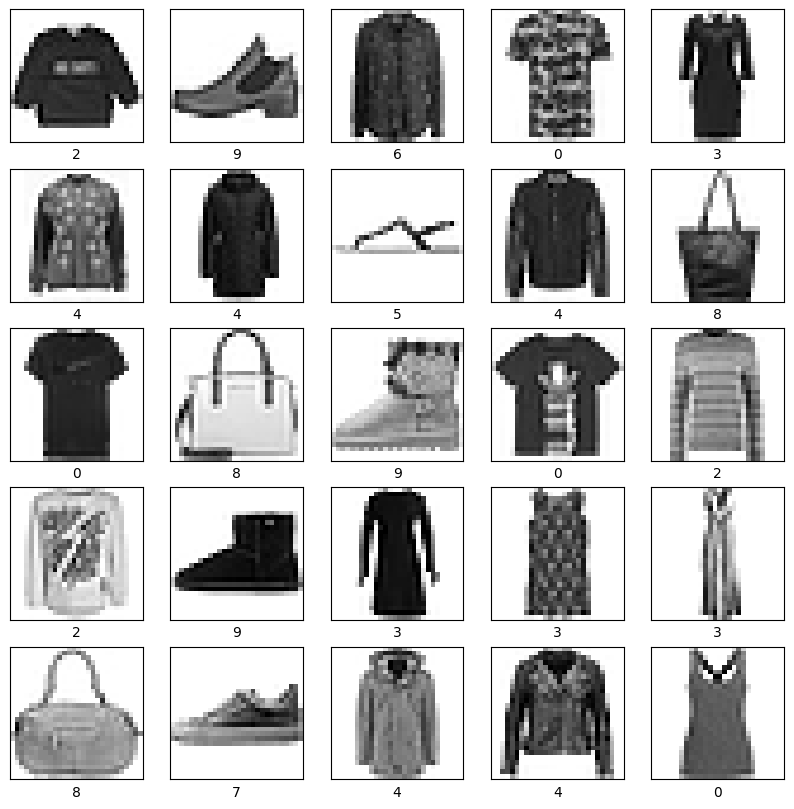

In [16]:
# Graficar una muestra de imágenes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(df_train.iloc[i, 1:]).reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(df_train.iloc[i, 0])
plt.show()


In [20]:
# Separación de variables dependientes e independientes para entrenamiento
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

In [21]:
# Definición del modelo con la métrica euclidiana
k = 5
neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [24]:
# Resultados con el conjunto de entrenamiento
y_pred_train = neigh.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[5503,    2,   80,   89,   15,    0,  277,    1,   33,    0],
       [  25, 5862,   21,   67,    6,    0,   17,    0,    1,    1],
       [  72,    3, 5244,   39,  382,    0,  254,    1,    4,    1],
       [ 214,   22,   44, 5475,  144,    0,   96,    0,    5,    0],
       [  27,    7,  486,  146, 5000,    0,  327,    0,    7,    0],
       [   2,    0,    1,    1,    1, 5327,   19,  370,   11,  268],
       [ 774,    5,  633,   93,  329,    0, 4133,    0,   32,    1],
       [   0,    0,    0,    1,    0,   12,    0, 5799,    0,  188],
       [  24,    1,   71,   22,   25,    3,   60,   22, 5768,    4],
       [   1,    0,    1,    0,    0,    9,    2,  138,    1, 5848]])

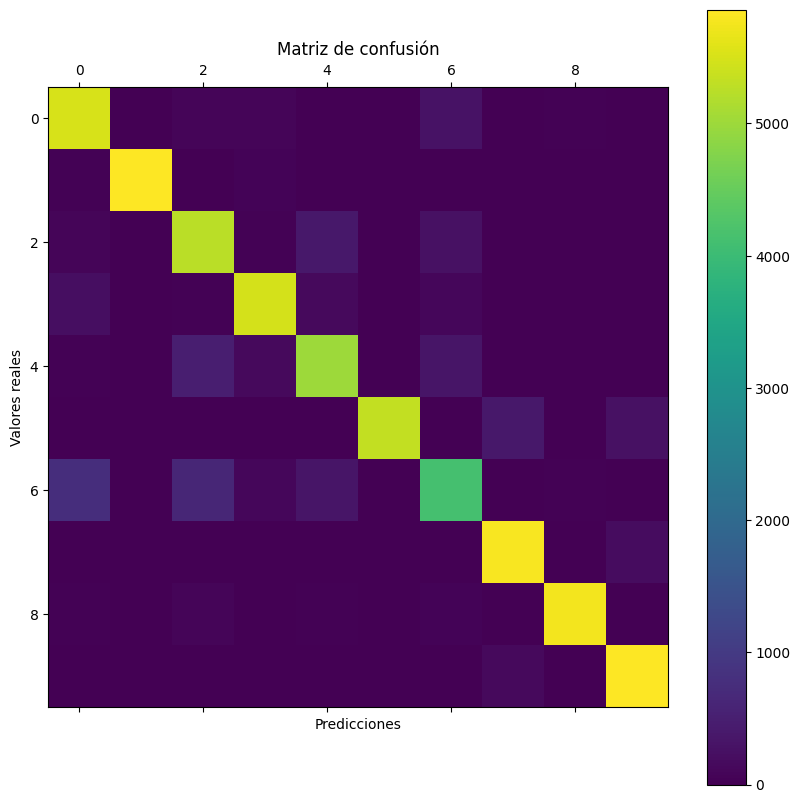

In [25]:
# Graficación de la matriz de confusión con colores
plt.figure(figsize=(10, 10))
plt.matshow(cm, fignum=1)
plt.title('Matriz de confusión')
plt.colorbar()
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [26]:
# Preparación del conjunto de prueba
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

In [27]:
# Predicción con el conjunto de prueba
y_pred_test = neigh.predict(X_test)

In [28]:
# Resultados con el conjunto de prueba
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[874,   1,  16,  11,   5,   0,  86,   2,   5,   0],
       [  4, 965,   7,  14,   1,   0,   9,   0,   0,   0],
       [ 18,   0, 808,  14,  98,   0,  61,   0,   1,   0],
       [ 36,  11,  14, 882,  32,   0,  25,   0,   0,   0],
       [  4,   0,  99,  26, 799,   0,  70,   0,   2,   0],
       [  1,   0,   1,   1,   0, 816,   8,  98,   4,  71],
       [202,   1, 114,  16,  74,   0, 583,   0,  10,   0],
       [  0,   0,   0,   0,   0,   1,   0, 945,   0,  54],
       [  2,   1,  14,   2,   6,   1,  13,   5, 953,   3],
       [  0,   0,   0,   0,   0,   2,   0,  34,   0, 964]])

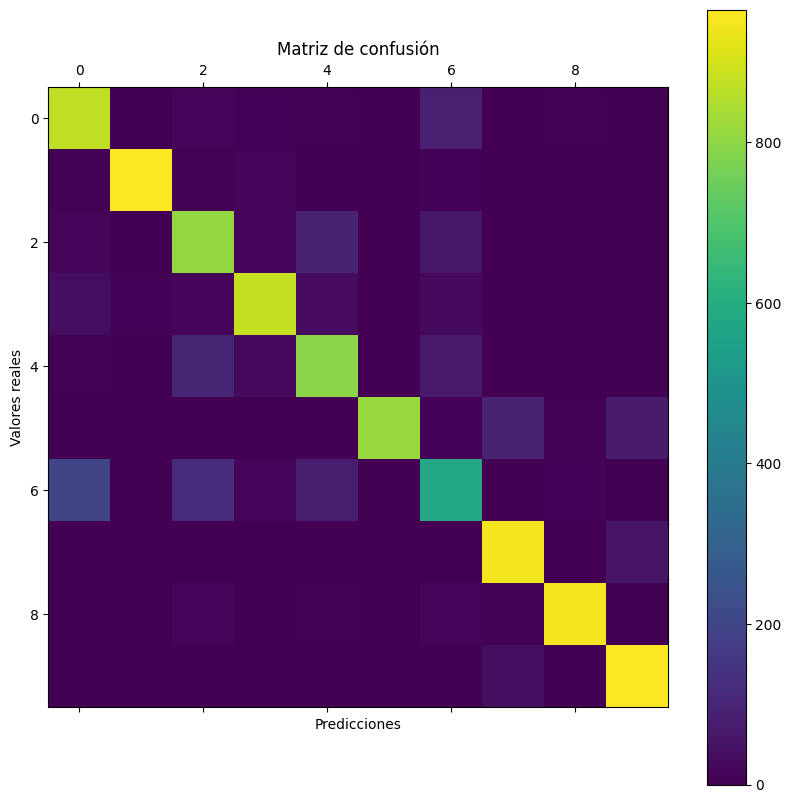

In [29]:
# Graficación de la matriz de confusión con colores
plt.figure(figsize=(10, 10))
plt.matshow(cm, fignum=1)
plt.title('Matriz de confusión')
plt.colorbar()
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()


In [31]:
# Reporte de clasificación tanto para el conjunto de entrenamiento como de prueba
print('Reporte de clasificación para el conjunto de entrenamiento')
print(classification_report(y_train, y_pred_train))

Reporte de clasificación para el conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6000
           1       0.99      0.98      0.99      6000
           2       0.80      0.87      0.83      6000
           3       0.92      0.91      0.92      6000
           4       0.85      0.83      0.84      6000
           5       1.00      0.89      0.94      6000
           6       0.80      0.69      0.74      6000
           7       0.92      0.97      0.94      6000
           8       0.98      0.96      0.97      6000
           9       0.93      0.97      0.95      6000

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



In [32]:
print('Reporte de clasificación para el conjunto de prueba')
print(classification_report(y_test, y_pred_test))

Reporte de clasificación para el conjunto de prueba
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.91      0.88      0.90      1000
           4       0.79      0.80      0.79      1000
           5       1.00      0.82      0.90      1000
           6       0.68      0.58      0.63      1000
           7       0.87      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [33]:
# Minkowski
knn_minkowski = KNeighborsClassifier(n_neighbors=k, metric='minkowski')

In [34]:
# Entrenamiento
knn_minkowski.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# Predicción con el conjunto de entrenamiento
y_pred_train_minkowski = knn_minkowski.predict(X_train)

In [36]:

# Predicción con el conjunto de prueba
y_pred_test_minkowski = knn_minkowski.predict(X_test)

In [37]:
# Reporte de clasificación tanto para el conjunto de entrenamiento como de prueba
print('Reporte de clasificación para el conjunto de entrenamiento')
print(classification_report(y_train, y_pred_train_minkowski))

Reporte de clasificación para el conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6000
           1       0.99      0.98      0.99      6000
           2       0.80      0.87      0.83      6000
           3       0.92      0.91      0.92      6000
           4       0.85      0.83      0.84      6000
           5       1.00      0.89      0.94      6000
           6       0.80      0.69      0.74      6000
           7       0.92      0.97      0.94      6000
           8       0.98      0.96      0.97      6000
           9       0.93      0.97      0.95      6000

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



In [38]:
print('Reporte de clasificación para el conjunto de prueba')
print(classification_report(y_test, y_pred_test_minkowski))

Reporte de clasificación para el conjunto de prueba
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.91      0.88      0.90      1000
           4       0.79      0.80      0.79      1000
           5       1.00      0.82      0.90      1000
           6       0.68      0.58      0.63      1000
           7       0.87      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

